In [204]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import pandas as pd

In [235]:
def calculate_error(actual, actual_time, predicted, predicted_time):
    actual_index = 0;
    error = 0
    for i in range(len(predicted)):
        if i == 0:
            continue
        if actual_index == len(actual):
            break
        if predicted[i] > actual[actual_index]: 
            slope = (predicted[i] - predicted[i-1]) / (predicted_time[i] - predicted_time[i-1])
            intercept = predicted[i] - slope * predicted_time[i]
            predicted_value = slope * actual_time[actual_index] + intercept
            error += abs(predicted_value - actual[actual_index])
            actual_index += 1
    return error

def calulate_curve(k, n):
    # Define the differential equation function
    def differential_equation(v, t, k, n):
        dvdt = 9.8 - k * v**n
        return dvdt

    # Define the initial condition and time points
    v0 = 0  # Initial condition
    t = np.linspace(0, 1.5, 100)  # Time points

    # Define constants

    # Solve the differential equation
    v = odeint(differential_equation, v0, t, args=(k, n))

    x0 = 0
    v = v.ravel()
    x = cumtrapz(v, t, initial=x0)

    # Plot the integral of x
    # plt.plot(t, x)
    # plt.plot(t_data, x_data, 'o')
    # plt.xlabel('Time (t)')
    # plt.ylabel('Position')
    # plt.title('Position vs Time')
    # plt.grid()
    # plt.show()
    return x, t

1.0 0.0 9.200155903581273
1.0 0.1 8.978728344902835
1.0 0.2 8.762015118583538
1.0 0.30000000000000004 8.549893307383854
1.0 0.4 8.342243502246149
1.0 0.5 8.138949789565505
1.0 0.6000000000000001 7.93989965733927
1.0 0.7000000000000001 7.744983871220503
1.0 0.8 7.554096369628381
1.0 0.9 7.367134171062069
1.0 1.0 7.183997272768387
1.0 1.1 7.004588560109106
1.0 1.2000000000000002 6.828813716991039
1.0 1.3 6.65658113687869
1.0 1.4000000000000001 6.487801838295169
1.0 1.5 6.322389382680697
1.0 1.6 6.160259795728612
1.0 1.7000000000000002 6.001331490392976
1.0 1.8 5.845525193152975
1.0 1.9000000000000001 5.692763873022548
1.0 2.0 5.542972671527734
1.0 2.1 5.396078835993073
1.0 2.2 5.252011654631203
1.0 2.3000000000000003 5.110702393794149
1.0 2.4000000000000004 4.972084238803795
1.0 2.5 4.836092233604434
1.0 2.6 4.702663224991827
1.0 2.7 4.571735608713111
1.0 2.8000000000000003 4.443250075746903
1.0 2.9000000000000004 4.317148357274393
1.0 3.0 4.193373980114591
1.0 3.1 4.071872016534778
1.0 

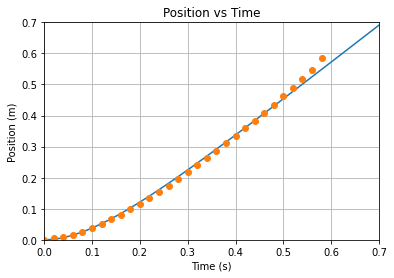

In [236]:
data = pd.read_csv('data.csv')
t_data = data["Time (s)"]
x_data = data["Position (m)"]
t_data = t_data - t_data[0]
x_data = x_data - x_data[0]

min = 100000000
best_k = 0
best_n = 0
for n in np.arange(1, 4, 0.1):
    for k in np.arange(0, 20, 0.1):
        x, t = calulate_curve(k, n)
        error = calculate_error(x_data, t_data, x, t)
        if error < min:
            min = error
            best_k = k
            best_n = n
        print(n, k, error)

print("Best(n, k, r2): ", best_n, best_k, max)
x, t = calulate_curve(best_k, best_n)
plt.plot(t, x)
plt.plot(t_data, x_data, 'o')
plt.xlim(0, 0.7)
plt.ylim(0, 0.7)
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Position vs Time')
plt.grid()
plt.show()
